<a href="https://colab.research.google.com/github/jfink09/Algorithmic-Trading/blob/main/Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Qais Trading Strategy 1

Requirements:

*

In [1]:
# Import the necessary libraries
try:
  import yfinance as yf
  import mplfinance
  import pandas as pd
  import matplotlib.pyplot as plt
  from mplfinance.original_flavor import candlestick_ohlc
  import matplotlib.dates as mpl_dates
except:
  !pip install yfinance
  !pip install mplfinance
  import yfinance as yf
  import mplfinance
  import pandas as pd

In [2]:
# Import the stock data and turn it into a Pandas dataframe
#GOOG = yf.download('GOOG',start='2004-08-19',end='2013-03-01')
#data = pd.DataFrame(GOOG)
TSLA = yf.download('TSLA',start=None,end=None)
data = pd.DataFrame(TSLA)
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2023-06-12  247.940002  250.970001  244.589996  249.830002  249.830002   
2023-06-13  253.509995  259.679993  251.339996  258.709991  258.709991   
2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
2023-06-16  258.920013  263.600006  257.209

In [3]:
# Calculate 9-day EMA
ema_length = 9
ema = data['Close'].ewm(span=ema_length).mean()

# Count the number of days above the 9-day EMA for the last 7 days
lookback_period = 7
above_count = data['Close'].rolling(window=lookback_period).apply(lambda x: (x > ema[-1]).sum())

# Generate buy signals if the number of days above the 9-day EMA are at least 5
buy_signal = above_count >= 5
buy_signal = buy_signal.shift(1) & buy_signal

In [4]:
# Add EMA to the DataFrame

data['EMA'] = ema

print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2023-06-12  247.940002  250.970001  244.589996  249.830002  249.830002   
2023-06-13  253.509995  259.679993  251.339996  258.709991  258.709991   
2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
2023-06-16  258.920013  263.600006  257.209991  260.540009  260.540009   

               Volume         EMA  
D

In [5]:
# Calculate 50-day rolling average of volume
rolling_average = data['Volume'].rolling(window=50).mean()
data['Avg. Volume'] = rolling_average
data = data.tail(3000)
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-07-18    1.822667    1.830000    1.775333    1.815333    1.815333   
2011-07-19    1.838667    1.874000    1.836000    1.859333    1.859333   
2011-07-20    1.866667    2.029333    1.853333    1.912667    1.912667   
2011-07-21    1.927333    1.944000    1.873333    1.913333    1.913333   
2011-07-22    1.913333    1.969333    1.903333    1.952667    1.952667   
...                ...         ...         ...         ...         ...   
2023-06-12  247.940002  250.970001  244.589996  249.830002  249.830002   
2023-06-13  253.509995  259.679993  251.339996  258.709991  258.709991   
2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
2023-06-16  258.920013  263.600006  257.209991  260.540009  260.540009   

               Volume         EMA  Av

<ipython-input-6-7bf8d2100bb8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Date'] = pd.to_datetime(data.index)
<ipython-input-6-7bf8d2100bb8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)


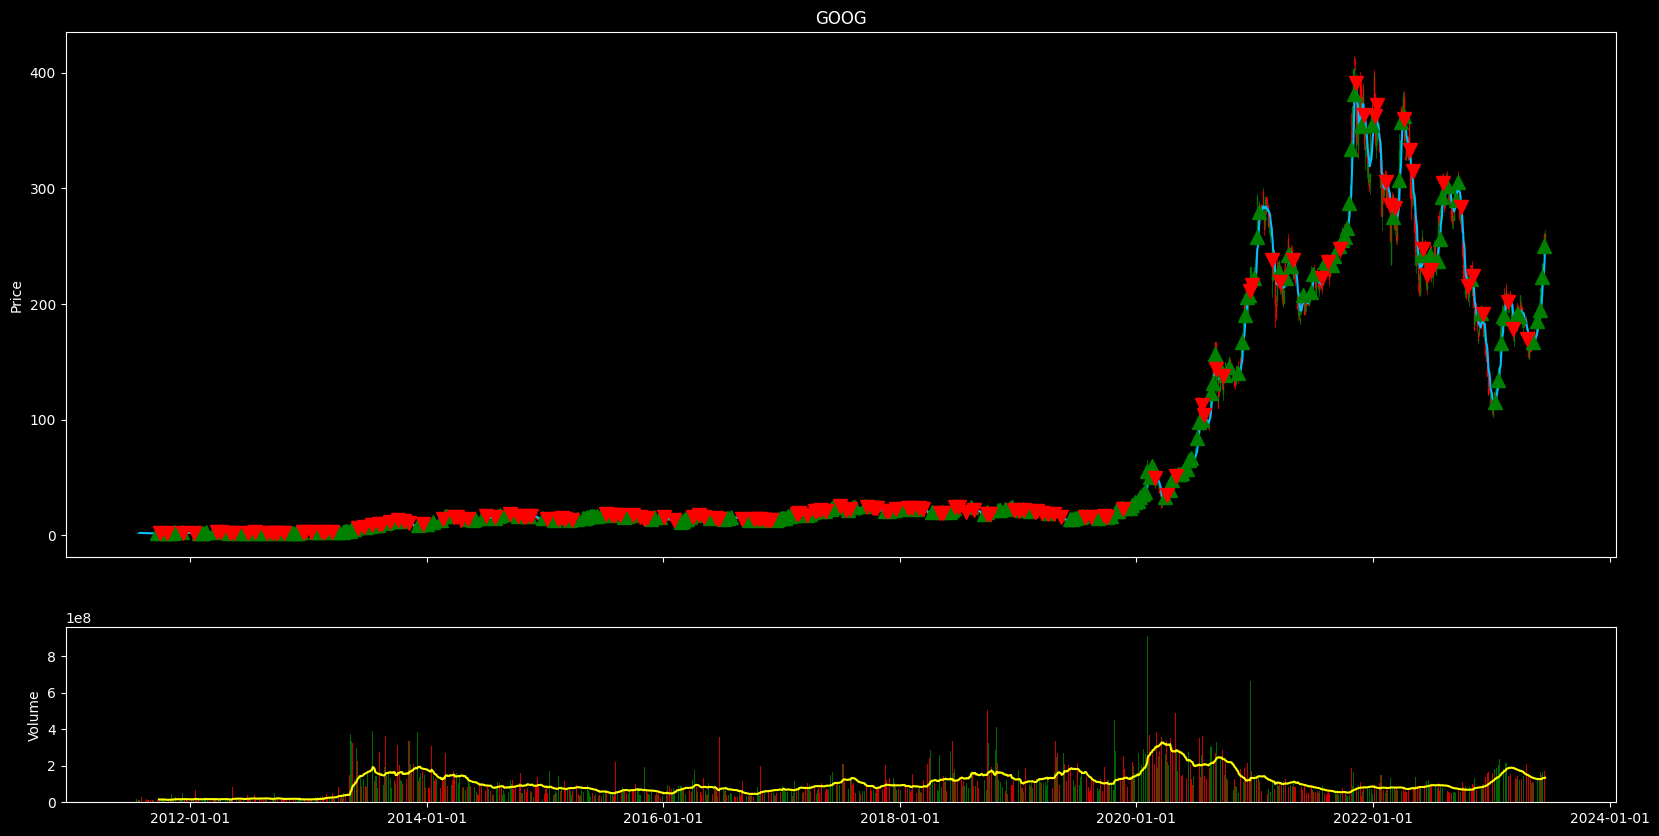

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the 9-day EMA
ema = data['Close'].rolling(window=9).mean()

# Track counts for buy and sell signals
buy_count = 0
sell_count = 0

# Create a figure and two subplots: one for OHLC with buy/sell signals and one for volume
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Prepare OHLC data for plotting
ohlc = data[['Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(data.index)
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc[['Date', 'Open', 'High', 'Low', 'Close']]

candlestick_ohlc(ax1, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax1.plot(ema, label='EMA', color='#00bfff')
ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y-%m-%d'))

# Add green triangle for buy signal and reset count
for i in range(len(data)):
    if data['Close'][i] > ema[i]:
        buy_count += 1
        sell_count = 0
    else:
        buy_count = 0

    if buy_count >= 5:
        ax1.plot(data.index[i], data['Low'][i], marker='^', color='green', markersize=10, label='Buy')
        buy_count = 0

# Add red triangle for sell signal
for i in range(len(data)):
    if data['Close'][i] < ema[i] and data['Volume'][i] > data['Volume'].rolling(window=50).mean()[i]:
        if first_sell_signal:
            ax1.plot(data.index[i], data['High'][i], marker='v', color='red', markersize=10, label='Sell')
            first_sell_signal = False
    elif data['Close'][i] > ema[i]:
        sell_count = 0
        first_sell_signal = True

# Set labels and title for the price plot
ax1.set_ylabel('Price')
ax1.set_title('GOOG')

# Plot volume with 50-day rolling average in the second subplot
ax2.bar(data.index, data['Volume'], color=['green' if c > o else 'red' for c, o in zip(data['Close'], data['Open'])], alpha=0.8)
ax2.plot(data.index, data['Volume'].rolling(window=50).mean(), color='yellow', label='Volume (50-day MA)')
ax2.set_ylabel('Volume')

# Set the background color of the figure and subplots to black
fig.patch.set_facecolor('black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Set the color of the axes spines, ticks, and labels to white
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')

ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')
ax2.title.set_color('white')

plt.show()

In [7]:
total_trades = 0
profitable_trades = 0
gain_sum = 0
loss_sum = 0
max_return = 0
max_loss = 0
starting_portfolio_value = 10000
portfolio_value = starting_portfolio_value
buy_price = 0
sell_price = 0
trade_active = False

In [8]:
# first_sell_signal = True
# sell_price = 0

# for i in range(len(data)):
#     if data['Close'][i] > ema[i]:
#         if not trade_active:
#             buy_price = data['Close'][i]
#             trade_active = True
#             buy_count += 1
#             sell_count = 0
#     else:
#         if trade_active:
#             if first_sell_signal and data['Close'][i] < ema[i] * 0.95 and data['Volume'][i] > data['Volume'].rolling(window=50).mean()[i]:
#                 sell_price = data['Close'][i] if data['Close'][i] >= ema[i] * 0.95 else ema[i] * 0.95
#                 first_sell_signal = False
#             trade_active = False
#             total_trades += 1
#             gain = (sell_price - buy_price) / buy_price * 100  # Calculate trade gain/loss percentage
#             if gain > 0:
#                 profitable_trades += 1
#                 gain_sum += gain
#                 max_return = max(max_return, gain)
#             else:
#                 loss_sum += gain
#                 max_loss = min(max_loss, gain)
#             portfolio_value += (portfolio_value * gain / 100)  # Update portfolio value based on trade gain/loss
#         buy_count = 0

In [9]:
for i in range(len(data)):
    if data['Close'][i] > ema[i]:
        if not trade_active:
            buy_price = data['Close'][i]
            trade_active = True
            buy_count += 1
            sell_count = 0
    else:
        if trade_active:
            sell_price = data['Close'][i]
            trade_active = False
            total_trades += 1
            gain = (sell_price - buy_price) / buy_price * 100  # Calculate trade gain/loss percentage
            if gain > 0:
                profitable_trades += 1
                gain_sum += gain
                max_return = max(max_return, gain)
            else:
                loss_sum += gain
                max_loss = min(max_loss, gain)
            portfolio_value += (portfolio_value * gain / 100)  # Update portfolio value based on trade gain/loss
        buy_count = 0

batting_average = profitable_trades / total_trades * 100 if total_trades > 0 else 0
average_gain = gain_sum / profitable_trades if profitable_trades > 0 else 0
average_loss = loss_sum / (total_trades - profitable_trades) if (total_trades - profitable_trades) > 0 else 0
gain_loss_ratio = abs(average_gain / average_loss) if average_loss != 0 else 0
total_return = (portfolio_value - starting_portfolio_value) / starting_portfolio_value * 100

In [10]:
# days = []
# lookback_period = 7
# cutoff = 5
# above_count = 0
# for i in range(len(data)):

#     if len(days) < lookback_period:
#       days.append(data['Close'][i] > ema[i])

#     if data['Close'][i] > ema[i]:
#         # Count the number of days above the 9-day EMA for the last 7 days
#         print(days)
#         buy_signal = False
#         if len(days) > 0:
#           numOfTrues = 0
#           for day in days:
#             if day:
#               numOfTrues += 1
#           if numOfTrues >= cutoff:
#             buy_signal = True


#         #above_count = data['Close'].rolling(window=lookback_period).apply(lambda x: (x > ema[-1]).sum())

#         # Generate buy signals if the number of days above the 9-day EMA are at least 5
#         #buy_signal = above_count >= 5
#         #buy_signal = buy_signal.shift(1) & buy_signal
#         if buy_signal:
#             print("BUY")
#             buy_price = data['Close'][i]
#             trade_active = True
#             buy_count += 1
#             sell_count = 0
#     elif data['Close'][i] < ema[i] and data['Volume'][i] > data['Volume'].rolling(window=50).mean()[i]:
#         if buy_count > 0:
#             print("SELL")
#             if data['Close'][i] <= ema[i] * 0.95:
#               sell_price = ema[i] * 0.95
#             else:
#               sell_price = data['Close'][i]
#             trade_active = False
#             total_trades += 1
#             gain = (sell_price - buy_price) / buy_price * 100  # Calculate trade gain/loss percentage
#             #print(gain)
#             if gain > 0:
#                 profitable_trades += 1
#                 gain_sum += gain
#                 max_return = max(max_return, gain)
#             else:
#                 loss_sum += gain
#                 max_loss = min(max_loss, gain)
#             portfolio_value += (portfolio_value * gain / 100)  # Update portfolio value based on trade gain/loss
#         buy_count = 0

#     if len(days) == lookback_period:
#       days.pop(0)
#       days.append(data['Close'][i] > ema[i])
#     else:
#       days.append(data['Close'][i] > ema[i])

# batting_average = profitable_trades / total_trades * 100 if total_trades > 0 else 0
# average_gain = gain_sum / profitable_trades if profitable_trades > 0 else 0
# average_loss = loss_sum / (total_trades - profitable_trades) if (total_trades - profitable_trades) > 0 else 0
# gain_loss_ratio = abs(average_gain / average_loss) if average_loss != 0 else 0
# total_return = (portfolio_value - starting_portfolio_value) / starting_portfolio_value * 100

In [11]:
print("Total Number of Trades: {:}".format(total_trades))
print("Batting Average: {:.2f}%".format(batting_average))
print("Gain/Loss Ratio: {:.2f}".format(gain_loss_ratio))
print("Average Gain: {:.2f}%".format(average_gain))
print("Average Loss: {:.2f}%".format(average_loss))
print("Maximum Return: {:.2f}%".format(max_return))
print("Maximum Loss: {:.2f}%".format(max_loss))
print("Total Return: {:.2f}%".format(total_return))
print("Final Portfolio Value: ${:.2f}".format(portfolio_value))

Total Number of Trades: 242
Batting Average: 35.54%
Gain/Loss Ratio: 3.59
Average Gain: 13.15%
Average Loss: -3.66%
Maximum Return: 148.23%
Maximum Loss: -19.27%
Total Return: 3413.58%
Final Portfolio Value: $351357.62
